In [4]:
import os
import time
import copy
import glob
import cv2
import shutil

import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional as F
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

In [5]:
from PIL import Image
import cv2
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt
import numpy as np

# read img
print('Original Data')

img_cv2 = cv2.imread('../data/c02/catanddog/train/dog.123.jpg')
img_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
print('cv2 shape(h, w, c) :', img_cv2.shape, type(img_cv2))

img_pil = Image.open('../data/c02/catanddog/train/dog.123.jpg')
print('pil size(w, h) :', img_pil.size, type(img_pil))


# original to tensor
print('\ntensor data')

img_cv2_tensor = F.to_tensor(img_cv2)
print('tensor(cv2) shape(c, h, w) : ', img_cv2_tensor.shape)

img_pil_tensor = F.to_tensor(img_pil)
print('tensor(pil) shape(c, h, w) :', img_pil_tensor.shape)


# to numpy
print("\nnumpy data")

img_cv2_numpy = img_cv2 # origin is numpy
print('cv2 numpy shape(h, w, c) :', img_cv2_numpy.shape, type(img_cv2_numpy))

img_pil_numpy = np.array(img_pil)
print('pil numpy shape(h, w, c) :', img_pil_numpy.shape, type(img_pil_numpy))


# numpy to tensor
print('\ntensor data(from numpy)')

img_cv2_tensor_numpy = torch.from_numpy(img_cv2_numpy)
print('tensor(cv2 / numpy) shape(h, w, c) :', img_cv2_tensor_numpy.shape)
print('for cnn shape(c, h, w) :', img_cv2_tensor_numpy.permute(2, 0, 1).shape)

img_pil_tensor_numpy = torch.from_numpy(img_pil_numpy)
print('tensor(pil / numpy) shape :', img_pil_tensor_numpy.shape)
print('for cnn shape(c, h, w) :', img_pil_tensor_numpy.permute(2, 0, 1).shape)






Original Data
cv2 shape(h, w, c) : (374, 500, 3) <class 'numpy.ndarray'>
pil size(w, h) : (500, 374) <class 'PIL.JpegImagePlugin.JpegImageFile'>

tensor data
tensor(cv2) shape(c, h, w) :  torch.Size([3, 374, 500])
tensor(pil) shape(c, h, w) : torch.Size([3, 374, 500])

numpy data
cv2 numpy shape(h, w, c) : (374, 500, 3) <class 'numpy.ndarray'>
pil numpy shape(h, w, c) : (374, 500, 3) <class 'numpy.ndarray'>

tensor data(from numpy)
tensor(cv2 / numpy) shape(h, w, c) : torch.Size([374, 500, 3])
for cnn shape(c, h, w) : torch.Size([3, 374, 500])
tensor(pil / numpy) shape : torch.Size([374, 500, 3])
for cnn shape(c, h, w) : torch.Size([3, 374, 500])


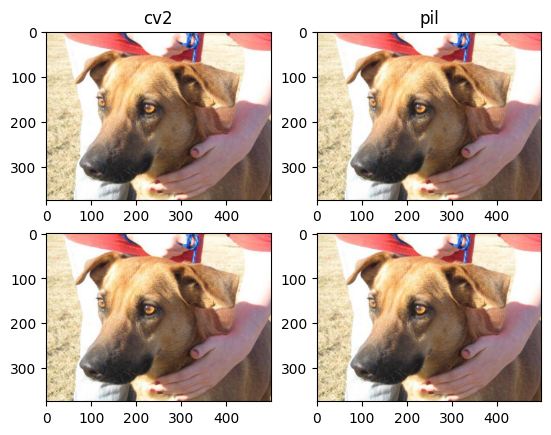

In [72]:
# show img in subplot
# img shape : h, w, c
fig, subplt = plt.subplots(2, 2)

subplt[0][0].imshow(img_cv2)
subplt[0][0].set_title('cv2')

subplt[0][1].imshow(img_pil)
subplt[0][1].set_title('pil')

subplt[1][0].imshow(img_cv2_tensor.permute(1, 2, 0))

subplt[1][1].imshow(img_pil_tensor.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


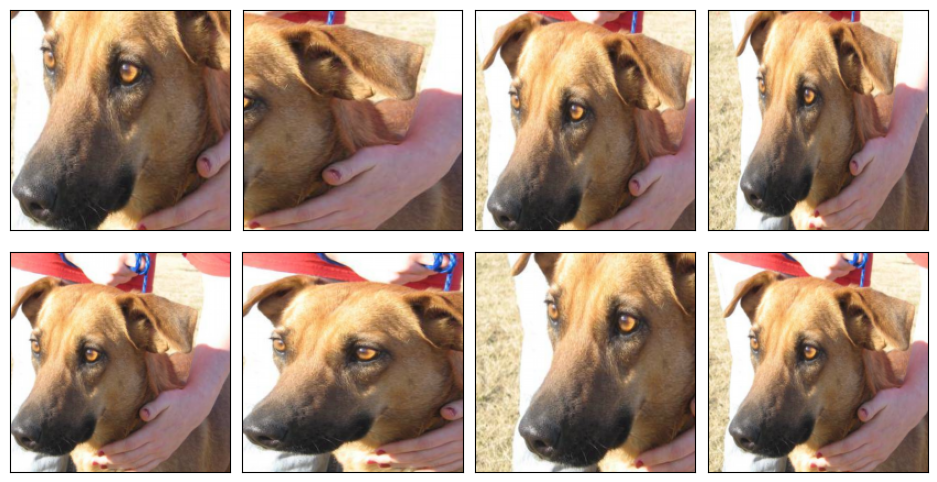

In [13]:
def show_images(imgs, num_rows, num_cols, scale=2):
    aspect_ratio = imgs[0].shape[0] / imgs[0].shape[1]
    figsize = (num_cols * scale, num_rows * scale * aspect_ratio)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
    plt.subplots_adjust(hspace=0.1, wspace=0)
    return axes

def apply(img, aug, num_rows=2, num_cols=4, scale=3):
    if not isinstance(img, torch.Tensor):
        img = F.to_tensor(img)

    Y = [aug(img) for _ in range(num_rows * num_cols)]  #    cnn shape : c, h, w
    Y_plot = list(map(lambda x: x.permute(1, 2, 0), Y)) # pyplot shape : h, w, c
    show_images(Y_plot, num_rows, num_cols, scale)


img = cv2.imread('../data/c02/catanddog/train/dog.123.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

shape_aug = transforms.RandomResizedCrop(size=(200, 200), scale=(0.1, 1), ratio=(0.5, 2))
apply(img, shape_aug)



In [74]:
data_path = '../data/c02/catanddog'


transform = transforms.Compose([
    transforms.Resize([256, 256]),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])
train_dataset = torchvision.datasets.ImageFolder(data_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, num_workers=8, shuffle=True)

print(len(train_dataset))

2000
